## EDA Prototype

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from map_genres import map_genre

/Users/codyliddle/Desktop/UVA Year 3/BAI/RLM-Booking/old_flask_app/Data


In [4]:
df = pd.read_csv(('/Users/codyliddle/Desktop/UVA Year 3/BAI/RLM-Booking/old_flask_app/Data/combined_output.csv'))

print("Initial DataFrame:")
print(df.head())

Initial DataFrame:
    artist_name                                              genre popularity  \
0  Johnny Yukon                                          trap soul         47   
1          Lauv                                                pop         75   
2        Foxing  alternative emo, bubblegrunge, dreamo, emo, st...         44   
3          Knox                              singer-songwriter pop         58   
4     Metallica  hard rock, metal, old school thrash, rock, thr...         83   

  followers                                       external_url ticket_sales  \
0     76627  https://open.spotify.com/artist/4fLF7NyMYLaMxU...    No events   
1   6287497  https://open.spotify.com/artist/5JZ7CnR6gTvEMK...      Unknown   
2    127189  https://open.spotify.com/artist/2dfxY7YDuYCUtW...      Unknown   
3    122224  https://open.spotify.com/artist/61S5H9Lxn1PDUv...      Unknown   
4  28338975  https://open.spotify.com/artist/2ye2Wgw4gimLv2...      Unknown   

  ticket_price  
0 

### Data Cleaning

In [5]:
print("\nData Cleaning:")

#replace 'No events', 'No price', and 'Unknown' with NaN
df['ticket_sales'] = df['ticket_sales'].replace(['No events', 'Unknown'], np.nan)
df['ticket_price'] = df['ticket_price'].replace(['No price', 'Unknown'], np.nan)
df['followers'] = df['followers'].replace('Unknown', np.nan)  # Add this line

#remove commas from 'followers' and convert to numeric
df['followers'] = df['followers'].astype(str).str.replace(',', '')
df['followers'] = pd.to_numeric(df['followers'], errors='coerce')
print("Converted 'followers' to numeric.")

#convert 'ticket_price' to float
df['ticket_price'] = pd.to_numeric(df['ticket_price'], errors='coerce')
print("Converted 'ticket_price' to float.")

#handle missing values in 'genre' by filling with 'Unknown'
df['genre'] = df['genre'].fillna('Unknown')
print("Filled missing 'genre' values with 'Unknown'.")

#split 'genre' into a list
df['genre_list'] = df['genre'].str.split(', ')
print("Split 'genre' into lists.")

#apply the mapping function
df['mapped_genre'] = df['genre_list'].apply(map_genre)

#display the DataFrame with the new 'mapped_genre' column
print(df[['artist_name', 'genre', 'mapped_genre']])
#display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())


Data Cleaning:
Converted 'followers' to numeric.
Converted 'ticket_price' to float.
Filled missing 'genre' values with 'Unknown'.
Split 'genre' into lists.
       artist_name                                              genre  \
0     Johnny Yukon                                          trap soul   
1             Lauv                                                pop   
2           Foxing  alternative emo, bubblegrunge, dreamo, emo, st...   
3             Knox                              singer-songwriter pop   
4        Metallica  hard rock, metal, old school thrash, rock, thr...   
..             ...                                                ...   
213  Guns N' Roses                        glam metal, hard rock, rock   
214   Jessie Murph          modern country pop, singer-songwriter pop   
215  Ariana Grande                                                pop   
216    Demi Lovato                                 pop, post-teen pop   
217   Natalie Jane                      

### Basic Description

#### Basic Plots

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

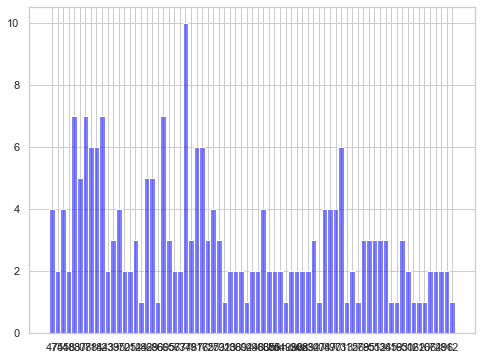

In [7]:
sns.set_theme(style="whitegrid")


# Plotting Popularity Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['popularity'], color='blue')
plt.title('Popularity Distribution')
plt.xlabel('Popularity')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='popularity', y='followers', hue='artist_name', s=100)
plt.title('Followers vs. Popularity')
plt.xlabel('Popularity')
plt.ylabel('Followers')
plt.legend(title='Artist')
plt.show()

plt.figure(figsize=(6, 4))
corr = df[['popularity', 'followers', 'ticket_price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()